## 1. Camera calibration

In this Section I will calibrate the camera using the picture containing chessboard.

In [2]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt
import matplotlib.image as mping
%matplotlib inline

## generate vectors to hold the cross points

img_points = [] # real points in the figure
obj_points = []

objp = np.zeros((6*9,3), np.float32) # desired points
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

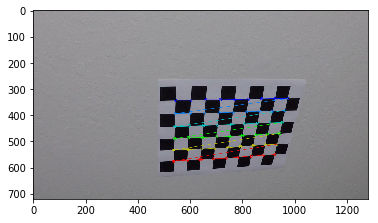

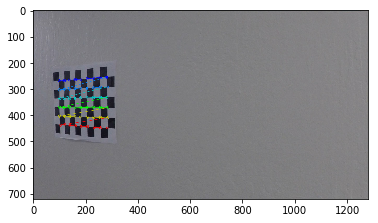

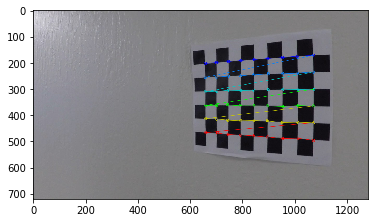

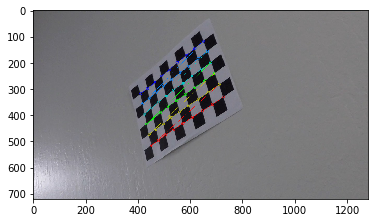

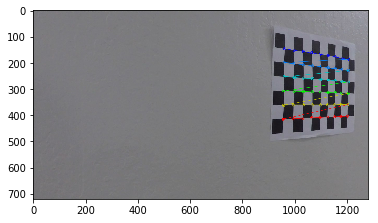

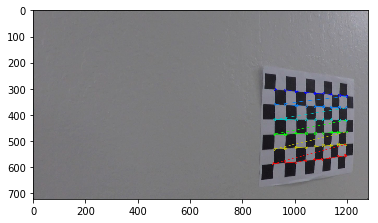

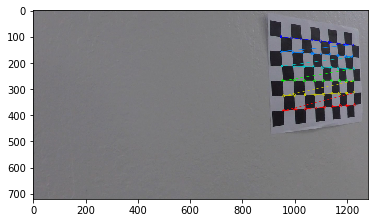

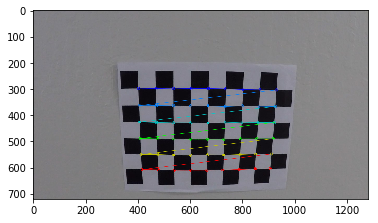

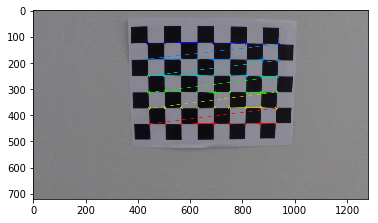

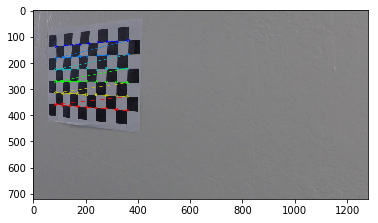

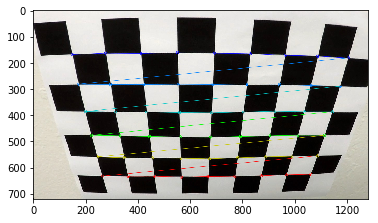

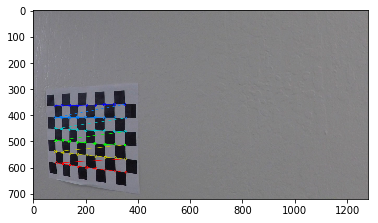

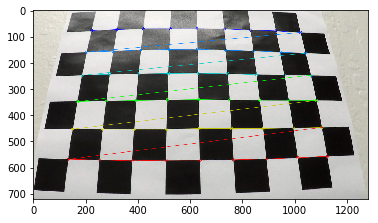

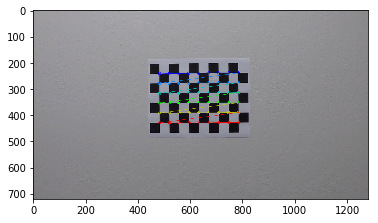

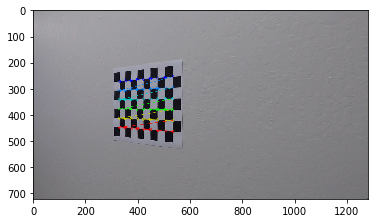

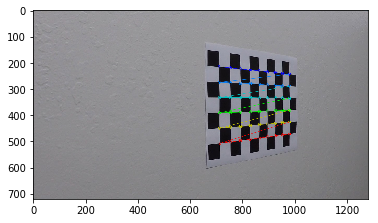

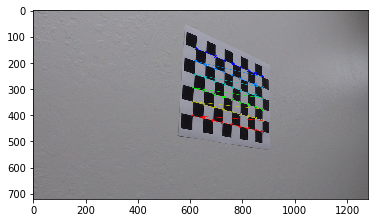

In [3]:
## read in all the images using glob API and find chessboard corners
import glob

images = glob.glob('.\camera_cal\calibration*.jpg')

for file in images:
    # read the image
    image = mping.imread(file)
    
    # gray scale the image   
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6), None)
    
    # if found, add the object and image points 
    if ret:
        img_points.append(corners)
        obj_points.append(objp)
        
        # draw the corners in the picture and display it
        plt.figure()
        image = cv2.drawChessboardCorners(image, (9,6), corners, ret)
        plt.imshow(image)
        figurename = file.split("\\")[-1]
#         plt.savefig(".\output_images\calibration\chessboardcorners_" + figurename)


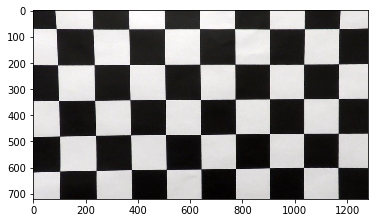

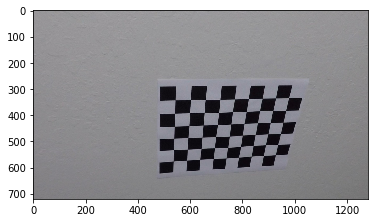

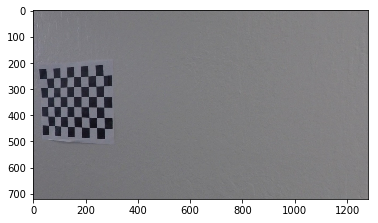

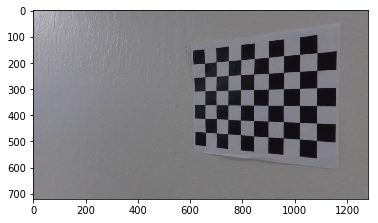

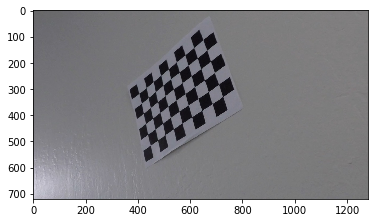

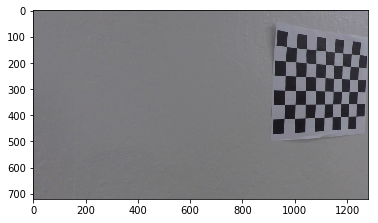

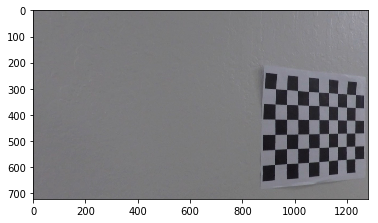

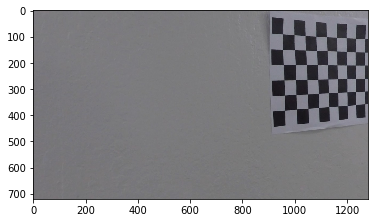

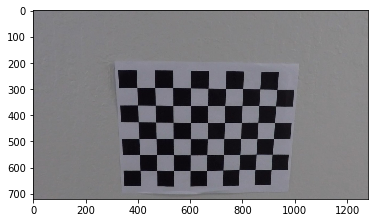

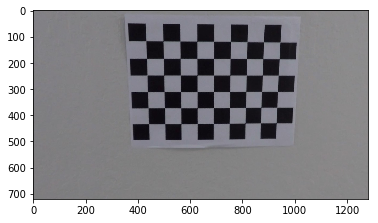

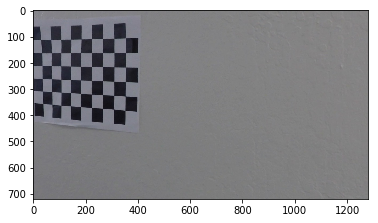

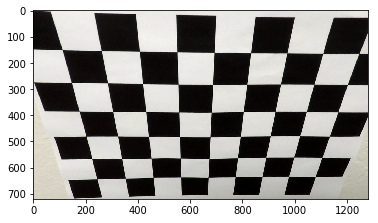

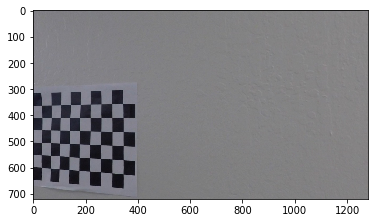

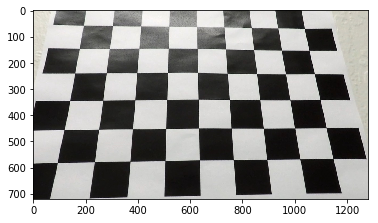

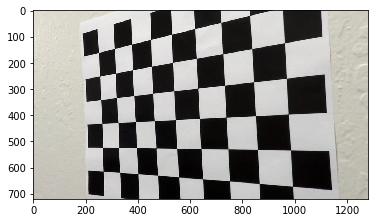

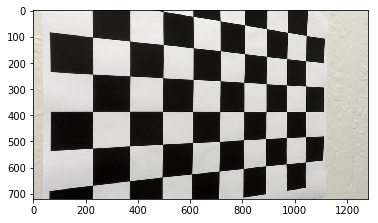

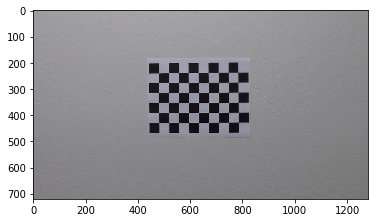

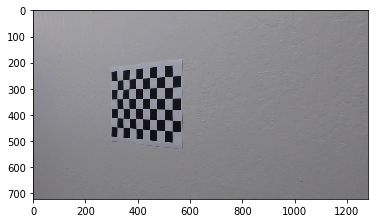

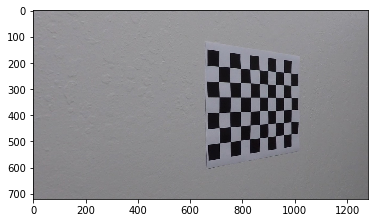

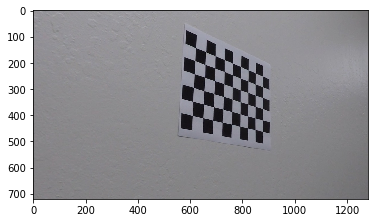

In [4]:
## define a fuction to calibrate and undistort the pictures from this camera

def cal_undistort(image, img_points, obj_points):
    
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(obj_points, img_points, gray.shape[::-1], None, None)
    
    return cv2.undistort(image, mtx, dist, None, mtx)

## test the calibration function

for file in images:
    image = mping.imread(file)
    image = cal_undistort(image, img_points, obj_points)
    plt.figure()
    plt.imshow(image)
    figurename = file.split("\\")[-1]
#     plt.savefig(".\output_images\calibration\\" + figurename)

## 2. Transform the pictures into bird-eye view

In this section I will undistort and transform the picture into bird-eye view buy selecting four tranform points and define four target points

(720, 1280, 3)


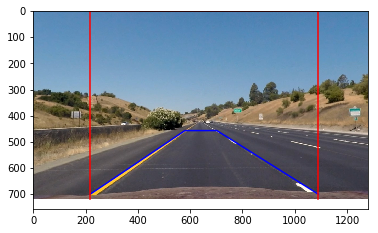

In [18]:
## transform the picture

# read in the picture, undistort it and find the transform points
image = mping.imread("./test_images/straight_lines1.jpg")
image = cal_undistort(image, img_points, obj_points)
plt.imshow(image)


plt.plot([218,580,702,1090], [700,457,457,700], 'b')
plt.plot([218,218,1090,1090], [720,0,0,720], 'r')
print(image.shape)

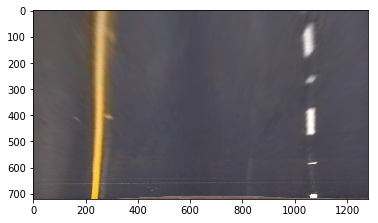

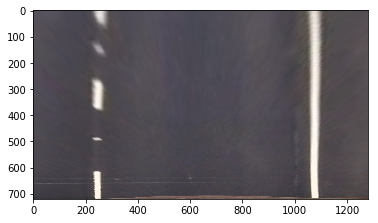

In [19]:
## transform the pictures and save it

def wrap(img):
    src = np.float32([[218,700], [580,457], [702,457], [1090,700]])
    dst = np.float32([[218,720], [218,0], [1090,0], [1090, 720]])
    img_size = (img.shape[1], img.shape[0])
    M = cv2.getPerspectiveTransform(src, dst)
    wraped = cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)
    return wraped

# test in two straight lines
plt.figure()
image = mping.imread("./test_images/straight_lines1.jpg")
image = cal_undistort(image, img_points, obj_points)
plt.imshow(wrap(image))
# plt.savefig("./output_images/undistort_and_tranform/straight_lines1.jpg")

plt.figure()
image = mping.imread("./test_images/straight_lines2.jpg")
image = cal_undistort(image, img_points, obj_points)
plt.imshow(wrap(image))
# plt.savefig("./output_images/undistort_and_tranform/straight_lines2.jpg")


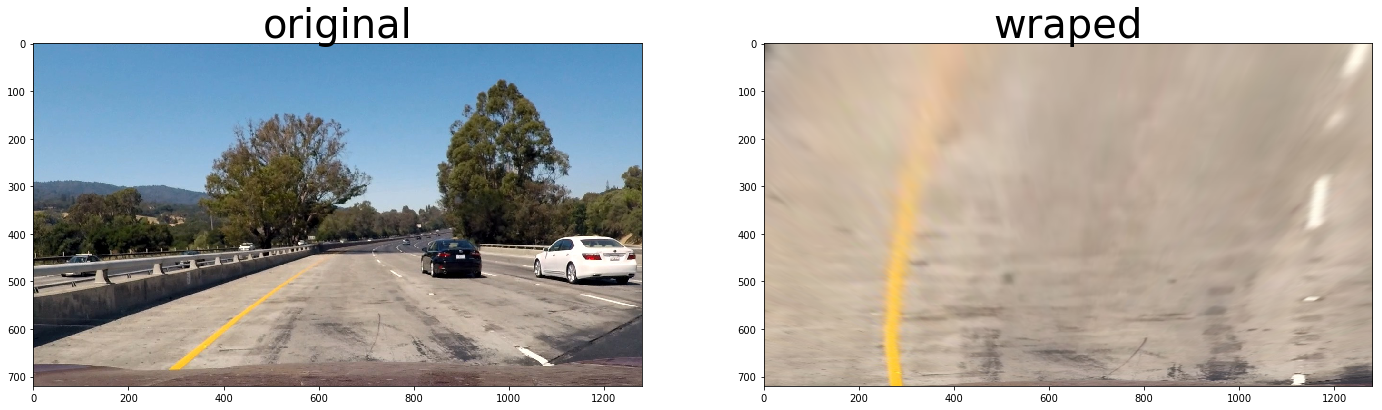

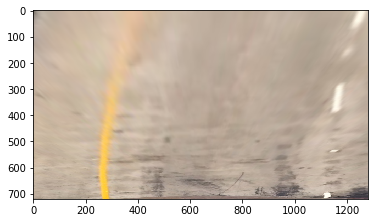

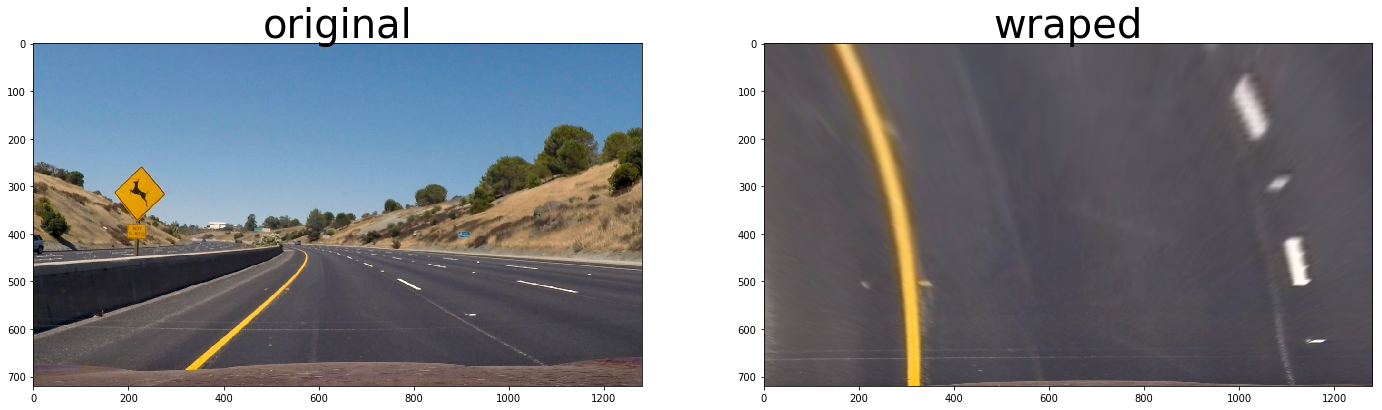

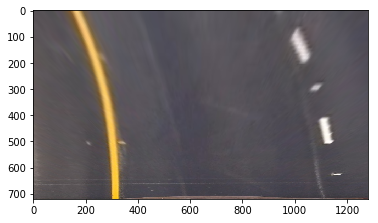

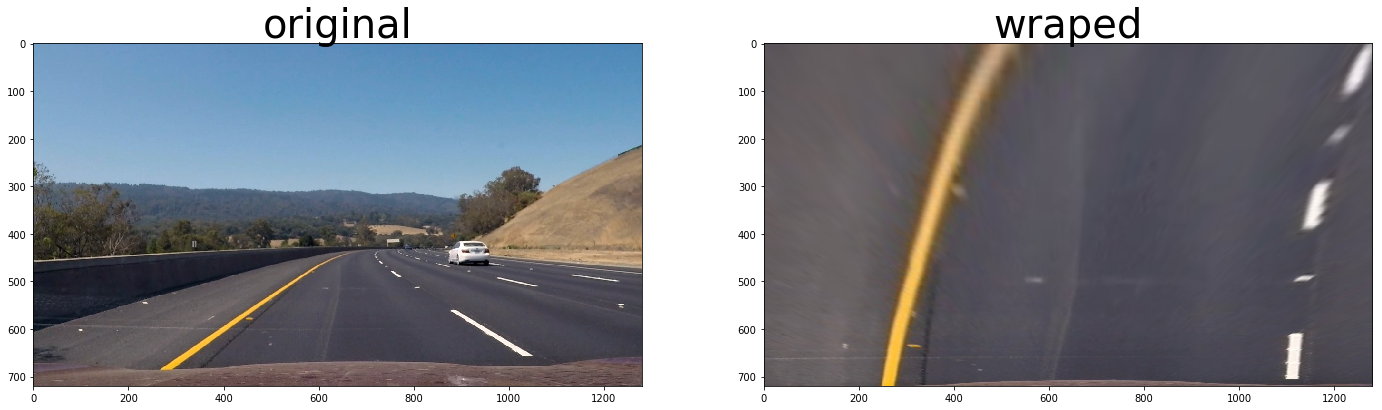

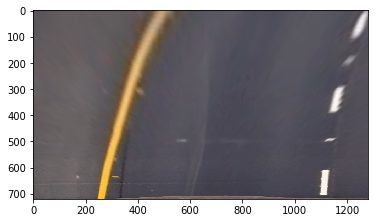

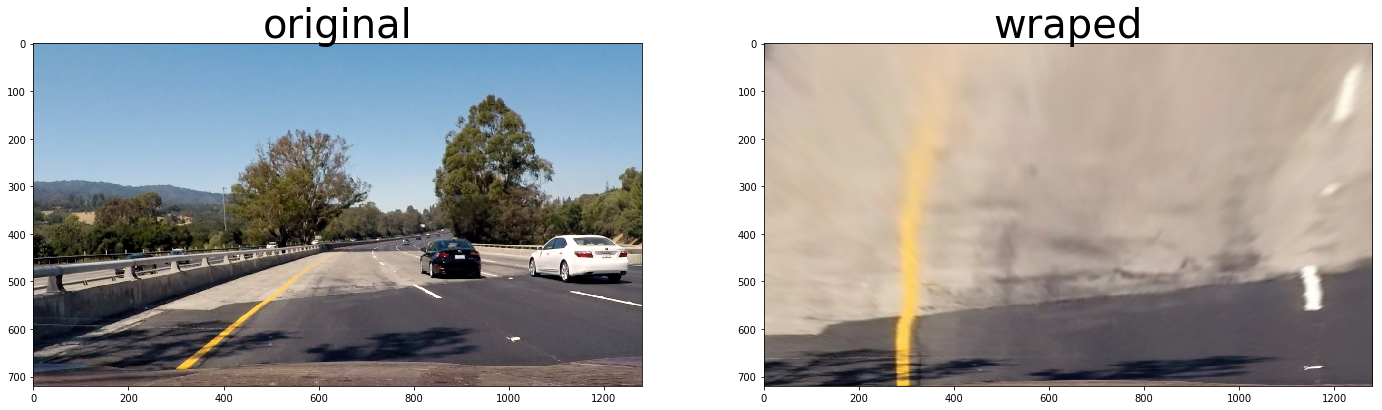

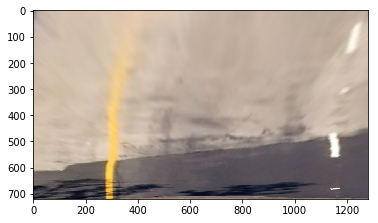

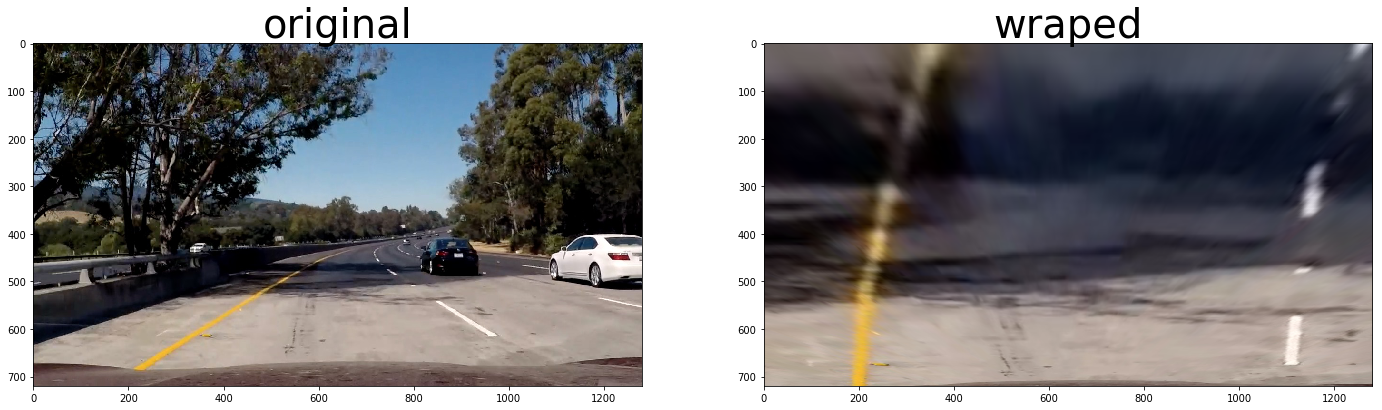

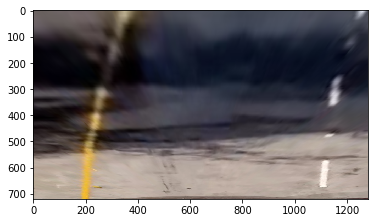

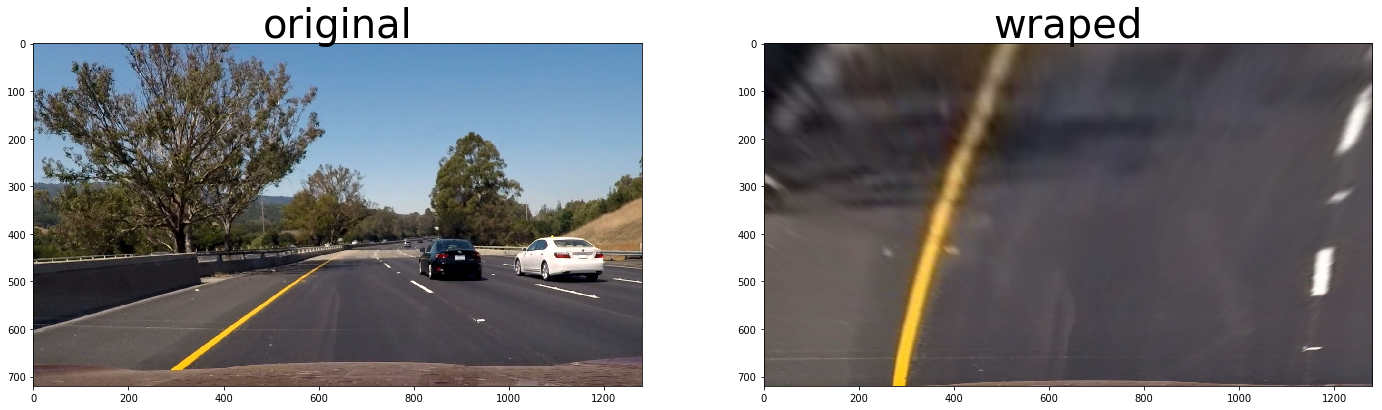

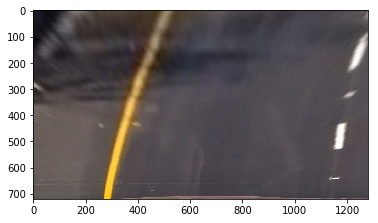

In [44]:
## test in all test case

images = glob.glob('./test_images/test*.jpg')

for file in images:
    image = mping.imread(file)
    figurename = file.split('\\')[-1]
    
    plt.figure(figsize=(24, 9))
    
    image = cal_undistort(image, img_points, obj_points)
    image = wrap(image)
    plt.subplot(1,2,2)
    plt.imshow(image)
    plt.subplot(1,2,2).set_title('wraped', fontsize=40)
    
    plt.subplot(1,2,1)
    plt.imshow(mping.imread(file))
    plt.subplot(1,2,1).set_title('original', fontsize=40)
#     plt.savefig("./output_images/undistort_and_tranform/compare_" + figurename)
    
    plt.figure()
    plt.imshow(image)
#     plt.savefig("./output_images/undistort_and_tranform/" + figurename)

## 3. Find the best channel to convert the picture preparing for finding the lane line

In this section I will try to convert the bird-eye view picture into gray scale, and the tree channels in HLS, then find a good combination of them.
This will make the task of finding lane line much more easier.